In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_mult_img_plt(rows, columns, img_names, titles, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title(titles[i])

<div style="background-color: #00008B; border: 2px solid #391339; border-radius: 800px; padding: 1px; margin: auto;">
 <p style="text-align:center;"><span style="font-size:24px; text-shadow: 1px 1px #000000;"><span style="color:#ccffff;"><span style="font-family:cursive;"> Ex 09</span> </span>  </span></p>
</div>

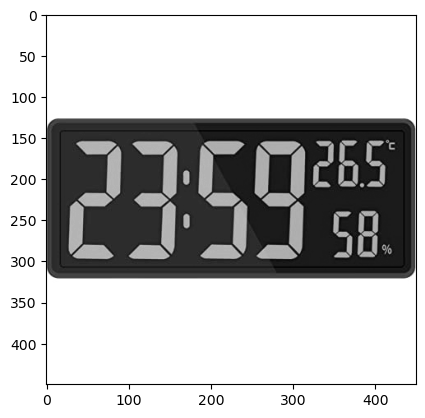

In [3]:
img = cv2.imread('clock.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')

In [60]:
# Denoising Stage
filtered_img = cv2.GaussianBlur(img,(3,3),0)

In [99]:
# Robert method
robert_kernel_x = np.array([[1, 0], [0, -1]])
robert_kernel_y = np.array([[0, 1], [-1, 0]])

robert_x_edge = cv2.filter2D(filtered_img, cv2.CV_64F, robert_kernel_x)
robert_y_edge = cv2.filter2D(filtered_img, cv2.CV_64F, robert_kernel_y)

robert_xy_edge = np.sqrt(np.square(robert_x_edge) + np.square(robert_y_edge)).astype('uint8')

_, robert_xy_edge = cv2.threshold(robert_xy_edge,0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [100]:
# Perwitt Method
prewitt_x_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

prewitt_x_edge = cv2.filter2D(filtered_img, cv2.CV_64F, prewitt_x_kernel)
prewitt_y_edge = cv2.filter2D(filtered_img, cv2.CV_64F, prewitt_y_kernel)

prewitt_xy_edge = np.sqrt(np.square(prewitt_x_edge) + np.square(prewitt_y_edge)).astype('uint8')

_, prewitt_xy_edge = cv2.threshold(prewitt_xy_edge,0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [104]:
# Sobel Method
sobel_x = cv2.Sobel(filtered_img, cv2.CV_64F,1,0, ksize = 3)
sobel_y = cv2.Sobel(filtered_img, cv2.CV_64F,0,1, ksize = 3)

sobel_xy = np.sqrt(np.square(sobel_x) + np.square(sobel_y)).astype('uint8')

## Second method
# sobel_x = np.absolute(sobel_x)
# sobel_y = np.absolute(sobel_y)
# sobel_xy = cv2.add(sobel_x,sobel_y).astype('uint8')
## Third method
# sobel_x = cv2.convertScaleAbs(sobel_x)
# sobel_y = cv2.convertScaleAbs(sobel_y)
# sobel_xy = cv2.addWeighted(sobel_x,0.5,sobel_y,0.5).astype('uint8')

thresh1 = 50
_, sobel_xy = cv2.threshold(sobel_xy,thresh1, 255,cv2.THRESH_BINARY)

In [105]:
# Laplacian Method
laplacian = cv2.Laplacian(filtered_img, -1, ksize = 3)
_, laplacian = cv2.threshold(laplacian,0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU )

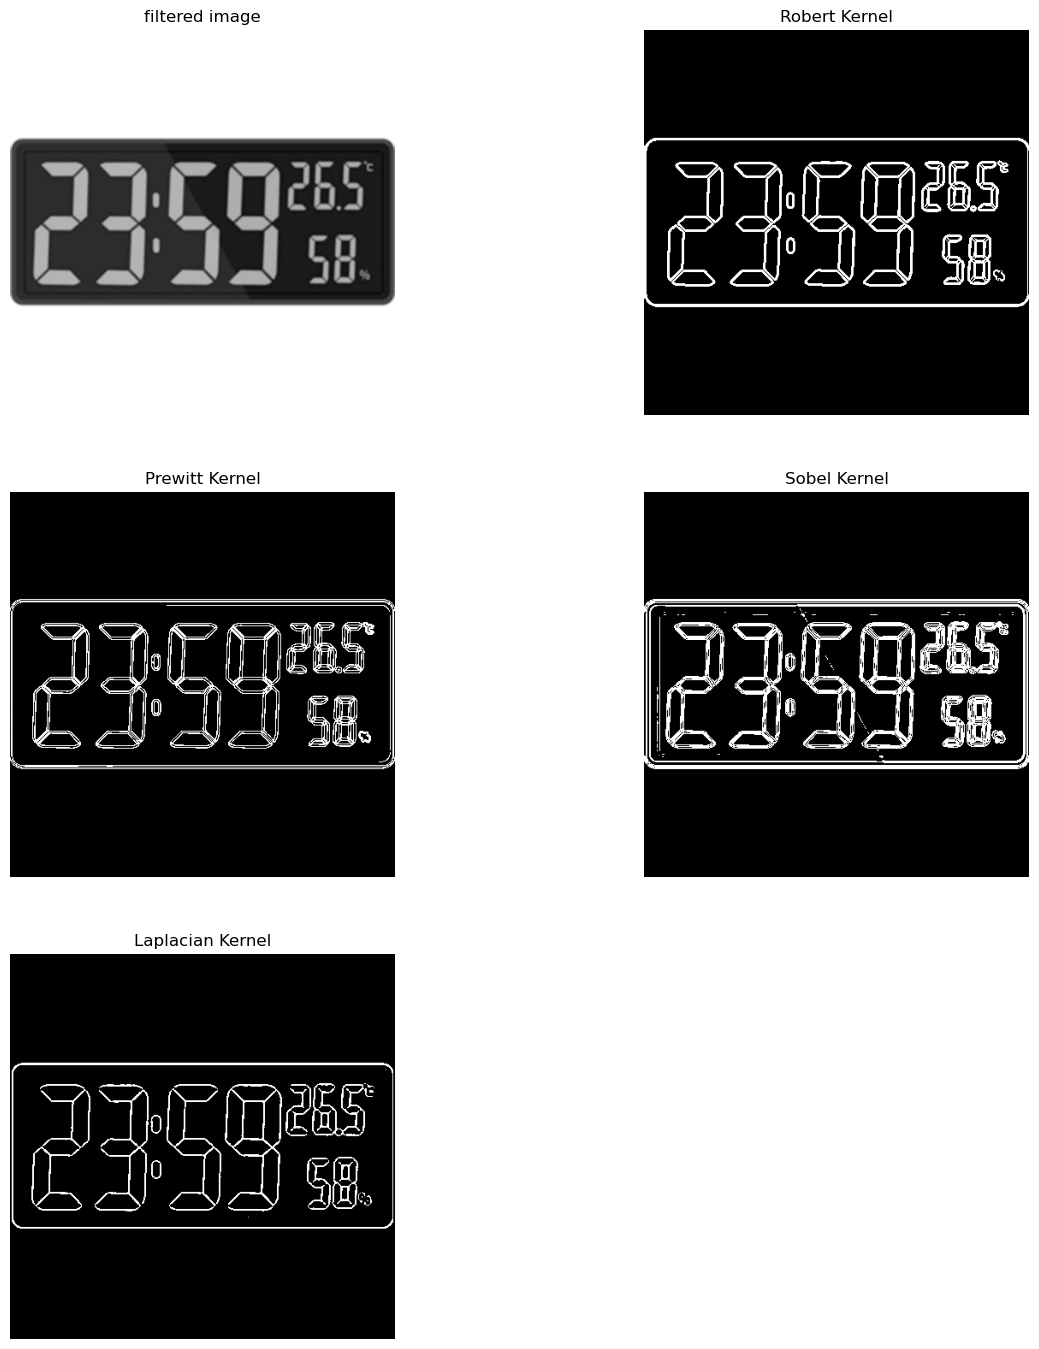

In [106]:
# Showing Results and Comparing Methods
show_mult_img_plt(3, 2, (filtered_img, robert_xy_edge, prewitt_xy_edge, sobel_xy, laplacian),\
                  titles=["filtered image", "Robert Kernel", "Prewitt Kernel", "Sobel Kernel", "Laplacian Kernel"])